Импорт библиотек

In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [26]:
df = pd.read_csv('S02-hw-dataset.csv', sep=',')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [28]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [29]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [30]:
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


Анализ подозрительных случаев

In [31]:
df[df['age'] > 100]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [32]:
df[(df['revenue'] <= 0) & (df['purchases'] > 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [33]:
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [34]:
df[df['age'] < 18]['age']

20    5.0
Name: age, dtype: float64

In [35]:
df[df['revenue'] < 0]

,user_id,age,country,purchases,revenue


В данных обнаружены критические ошибки, влияющие на достоверность любой последующей аналитики. Часть записей содержит невозможные значения: отрицательное число покупок, возраст 120 лет и 5 лет у активных покупателей. Также встречаются явные противоречия - когда за несколькими покупками числится нулевая выручка.

Дополнительно качество данных снижают пропущенные значения в возрасте и полные дубликаты записей.

In [36]:
df.value_counts(['country'])

country
RU         13
FR         12
US          8
DE          6
CN          2
Name: count, dtype: int64

In [37]:
df.groupby(['country'], as_index=False)[['age', 'purchases', 'revenue']].mean()

,country,age,purchases,revenue
0,CN,24.000000,4.500000,1054.000000
1,DE,34.600000,6.500000,1445.500000
2,FR,46.250000,4.250000,675.916667
3,RU,30.076923,4.769231,790.076923
4,US,36.714286,4.625000,557.375000


In [38]:
df.groupby(['country'], as_index=False)[['age', 'purchases', 'revenue']].max()

,country,age,purchases,revenue
0,CN,28.0,7,1652
1,DE,52.0,11,2475
2,FR,120.0,7,1608
3,RU,54.0,8,2086
4,US,51.0,9,980


In [39]:
df.groupby(['country'], as_index=False)[['age', 'purchases', 'revenue']].min()

,country,age,purchases,revenue
0,CN,20.0,2,456
1,DE,18.0,3,702
2,FR,22.0,-1,0
3,RU,5.0,0,0
4,US,23.0,3,0


In [40]:
bins = [0, 20, 30, 40, 50, 150]
labels = ['до 20', '21-30', '31-40', '41-50', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [41]:
df.groupby(['age_group'], as_index=False)[['age', 'purchases', 'revenue']].mean()

C:\Users\vsham\AppData\Local\Temp\ipykernel_25744\2418848259.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group'], as_index=False)[['age', 'purchases', 'revenue']].mean()


,age_group,age,purchases,revenue
0,до 20,11.500000,6.000000,1296.000000
1,21-30,24.076923,4.461538,565.538462
2,31-40,34.272727,6.000000,1216.272727
3,41-50,45.000000,3.000000,668.000000
4,50+,63.000000,4.142857,623.571429


In [42]:
df.groupby(['age_group'], as_index=False)[['age', 'purchases', 'revenue']].max()

C:\Users\vsham\AppData\Local\Temp\ipykernel_25744\392786840.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group'], as_index=False)[['age', 'purchases', 'revenue']].max()


,age_group,age,purchases,revenue
0,до 20,18.0,8,1488
1,21-30,28.0,7,1652
2,31-40,39.0,11,2475
3,41-50,47.0,6,1440
4,50+,120.0,7,1302


In [43]:
df.groupby(['age_group'], as_index=False)[['age', 'purchases', 'revenue']].min()

C:\Users\vsham\AppData\Local\Temp\ipykernel_25744\201770230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group'], as_index=False)[['age', 'purchases', 'revenue']].min()


,age_group,age,purchases,revenue
0,до 20,5.0,4,1104
1,21-30,20.0,0,0
2,31-40,31.0,2,330
3,41-50,42.0,0,0
4,50+,51.0,-1,142


In [44]:
df.groupby(['country'], as_index=False)[['purchases', 'revenue']].sum()

,country,purchases,revenue
0,CN,9,2108
1,DE,39,8673
2,FR,51,8111
3,RU,62,10271
4,US,37,4459


In [45]:
df.groupby(['age_group'], as_index=False)[['purchases', 'revenue']].sum()

C:\Users\vsham\AppData\Local\Temp\ipykernel_25744\4226364685.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group'], as_index=False)[['purchases', 'revenue']].sum()


,age_group,purchases,revenue
0,до 20,12,2592
1,21-30,58,7352
2,31-40,66,13379
3,41-50,18,4008
4,50+,29,4365


Среди стран доминируют Россия и Франция, на которые приходится более половины всех пользователей. Немецкие показывают максимальные средние чеки при меньшем количестве транзакций. На пользователей из США приходится наименьшая прибыль и количество покупок. Среди возрастных групп наибольшую прибыль приносят пользователи 31-40 лет, при этом суммарная прибыль, полученная от данной группы почти в 2 раза превышает прибыль от группы пользователей 21-30 лет, несмотря на малую разницу в количестве покупок. При этом, в среднем, аномальные значения показывают значения прибыли от группы до 20 лет, что может быть связано с малым количеством записей в самой группе, и качеством данных в этих записях


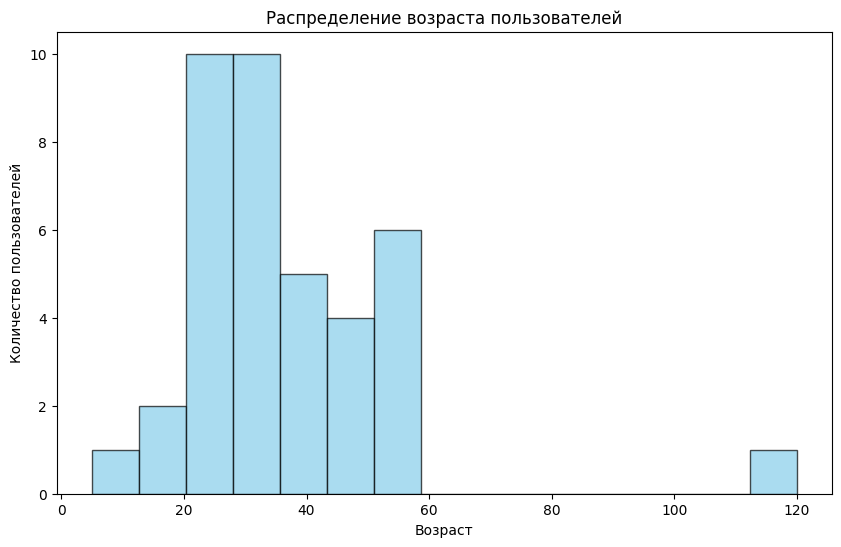

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



На гистограмме можно увидеть, что большая часть пользователей принадлежит возрастной группе 20-40 лет, при этом наименьшее количество покупок совершается пользователями до 20 лет

C:\Users\vsham\AppData\Local\Temp\ipykernel_25744\1434609974.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels=df['country'].unique())


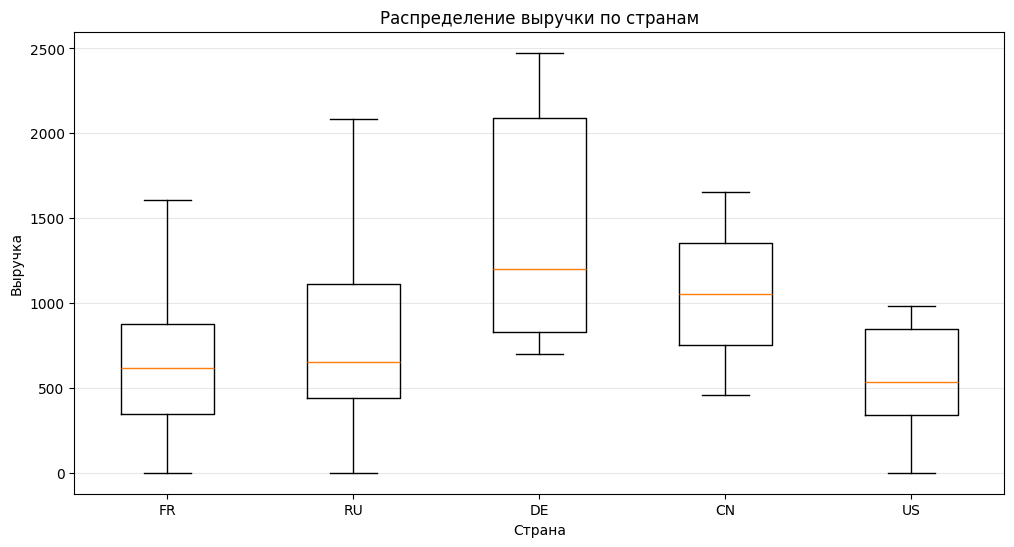

In [47]:
plt.figure(figsize=(12, 6))
country_data = [df[df['country'] == country]['revenue'].values for country in df['country'].unique()]
plt.boxplot(country_data, labels=df['country'].unique())
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.title('Распределение выручки по странам')
plt.grid(axis='y', alpha=0.3)
plt.savefig('figures/boxplot.png')
plt.show()


Боксплот выручки по странам наглядно демонстрирует преимущество немецкого рынка - не только более высокую медианную выручку, но и меньшее количество выбросов вниз по сравнению с другими странами

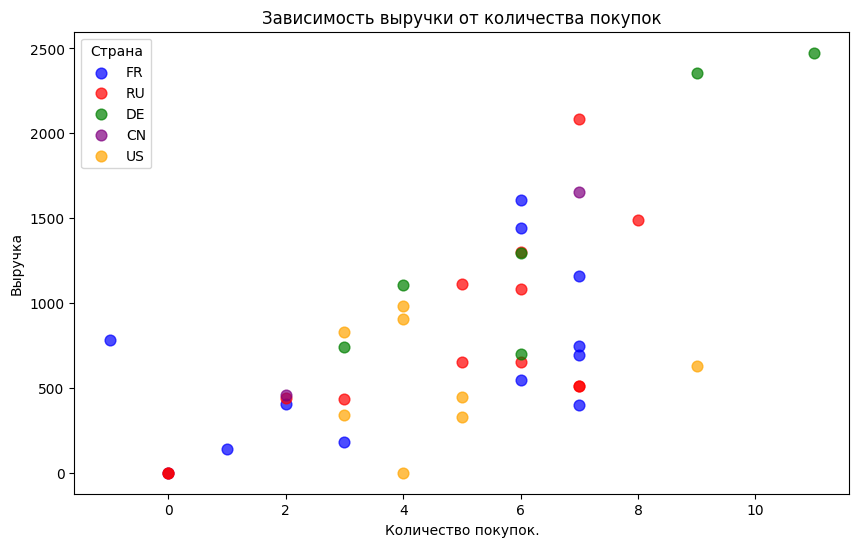

In [48]:
plt.figure(figsize=(10, 6))
colors = {'FR': 'blue', 'RU': 'red', 'DE': 'green', 'US': 'orange', 'CN': 'purple'}

for country in df['country'].unique():
    country_df = df[df['country'] == country]
    plt.scatter(country_df['purchases'], country_df['revenue'], 
               c=colors[country], label=country, alpha=0.7, s=60)


plt.xlabel('Количество покупок.')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от количества покупок')
plt.legend(title='Страна')
plt.savefig('figures/scatter.png')
plt.show()
